In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx


# About Dataset
- The Telco Customer Churn dataset consists of 7,043 records and 33 columns, providing detailed information about customers, their demographics, subscription details, billing history, and churn status. Key features include customer tenure, monthly charges, contract type, internet and phone service details, and whether they have additional services like online security, tech support, or streaming options. The dataset also contains churn-related variables such as the Churn Label, Churn Score, and Churn Reason, although the latter has many missing values. A notable issue is that the Total Charges column is stored as an object instead of a numeric value, requiring conversion for proper analysis. To gain insights, an exploratory data analysis (EDA) can reveal patterns in churn behavior, such as the impact of contract types, payment methods, and tenure on customer retention. Additionally, machine learning models like Logistic Regression or Random Forest can be applied to predict churn and identify key factors influencing customer decisions. Cleaning the dataset, handling missing values, and performing feature engineering will be essential steps before building predictive models.

# Key Observations from Data Types
- Categorical Variables (Objects - 24 columns): Includes Gender, Partner, Dependents, Contract, Churn Label, Payment Method, etc.
- Numerical Variables (Integers & Floats - 9 columns): Includes Tenure Months, Monthly Charges, Churn Score, CLTV, etc.
# Potential Issues:
- Total Charges is stored as object (string) instead of a numerical format (float). It may contain missing or erroneous values.
- Churn Reason has many missing values (only 1,869 non-null out of 7,043).

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import os

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Check available files in Kaggle dataset
print(os.listdir("/kaggle/input/"))

['telco-customer-churn-ibm-dataset']


# Load The Dataset

In [5]:
# Use read_excel instead of read_csv
df = pd.read_excel("/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx")

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.shape

(7043, 33)

In [8]:
df.describe()  #only numerical columns

#df.describe(include="object")(include categorical data)

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [9]:
# Print all column names
print("Columns in dataset:", df.columns)

# Drop irrelevant columns
columns_to_drop = ["Lat Long", "Zip Code", "Country", "State", "City", "Churn Label", "Churn Reason"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

Columns in dataset: Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


# Handle Missing Values

In [10]:
# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Convert 'Total Charges' to numeric (handle errors)
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors='coerce')

# Fill missing values with median
df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)

# Drop any remaining rows with missing values
df.dropna(inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 CustomerID           0
Count                0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64
Missing values after cleaning:
 CustomerID           0
Count                0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
De

<ipython-input-10-fd82073cf641>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


## Encode Categorical Columns Efficiently

In [11]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Exclude 'customerID' if still present
cat_cols = [col for col in cat_cols if col != 'customerID']

# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:       
    df[col] = le.fit_transform(df[col])  # categorical transform to numerical

df.head()

,CustomerID,Count,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,2564,1,33.964131,-118.272783,1,0,0,0,2,1,...,0,0,0,1,3,53.85,108.15,1,86,3239
1,6511,1,34.059281,-118.307420,0,0,0,1,2,1,...,0,0,0,1,2,70.70,151.65,1,67,2701
2,6551,1,34.048013,-118.293953,0,0,0,1,8,1,...,2,2,0,1,2,99.65,820.50,1,86,5372
3,5604,1,34.062125,-118.315709,0,0,1,1,28,1,...,2,2,0,1,2,104.80,3046.05,1,84,5003
4,174,1,34.039224,-118.266293,1,0,0,1,49,1,...,2,2,0,1,0,103.70,5036.30,1,89,5340


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   int64  
 1   Count              7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   int64  
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

In [13]:
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Remove outliers

In [14]:
def remove_outliers(df, columns):  #IQR method
    # Calculate the first and third quartiles
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Filter the DataFrame to remove outliers
    df_filtered = df[(df[columns] >= (Q1 - 1.5 * IQR)) & (df[columns] <= (Q3 + 1.5 * IQR))]
    return df_filtered


# Specify the numerical columns to clean (e.g., 'Monthly Charges' and 'Total Charges')
columns_to_clean = ['Monthly Charges', 'Total Charges']

# Remove outliers
df_cleaned = remove_outliers(df, columns_to_clean)

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(df_cleaned.head())

# Verify the shape of the cleaned DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

DataFrame after removing outliers:
   Count  Latitude  Longitude  Tenure Months  Monthly Charges  Total Charges  \
0    NaN       NaN        NaN            NaN            53.85         108.15   
1    NaN       NaN        NaN            NaN            70.70         151.65   
2    NaN       NaN        NaN            NaN            99.65         820.50   
3    NaN       NaN        NaN            NaN           104.80        3046.05   
4    NaN       NaN        NaN            NaN           103.70        5036.30   

   Churn Value  Churn Score  CLTV CustomerID_1  ... Streaming TV_1  \
0          NaN          NaN   NaN          NaN  ...            NaN   
1          NaN          NaN   NaN          NaN  ...            NaN   
2          NaN          NaN   NaN          NaN  ...            NaN   
3          NaN          NaN   NaN          NaN  ...            NaN   
4          NaN          NaN   NaN          NaN  ...            NaN   

  Streaming TV_2 Streaming Movies_1 Streaming Movies_2 Contract

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Text(0.5, 1.0, 'After Outlier Removal')

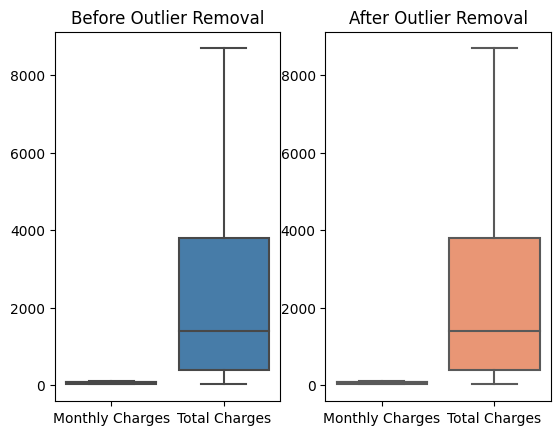

In [15]:
# Boxplot Before Removing Outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(data=df[columns_to_clean], palette="Set1")
plt.title("Before Outlier Removal")

# Boxplot After Removing Outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df_cleaned[columns_to_clean], palette="Set2")
plt.title("After Outlier Removal")

# observation:
- The code creates side-by-side boxplots to compare data distributions before and after outlier removal. The left plot shows the original dataset, while the right plot displays the cleaned data, helping visualize the impact of removing outliers.

# EDA(Explorative Data analysis)

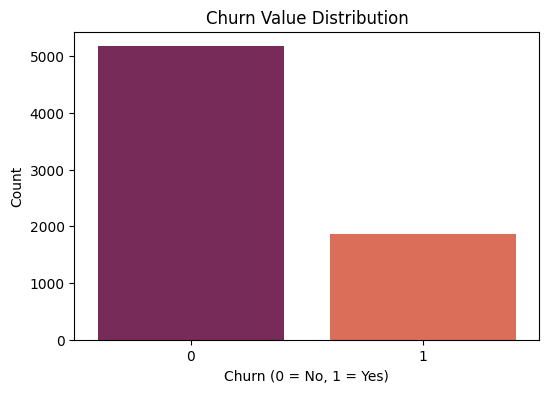

In [16]:
# Countplot for Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn Value'], palette='rocket')
plt.title('Churn Value Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# observation:
- The countplot visualization provides insights into the distribution of churned and non-churned customers within the dataset. By plotting the Churn Value column using Seaborn's countplot function, we can observe the frequency of customers who have either stayed (0) or left (1). The use of the 'rocket' color palette enhances visual appeal, while the inclusion of labels and annotations ensures clarity in interpretation. This analysis helps in understanding the imbalance in churn distribution, which is crucial for model development and business decision-making. Adding value labels on the bars further improves readability, making it easier to grasp key insights at a glance

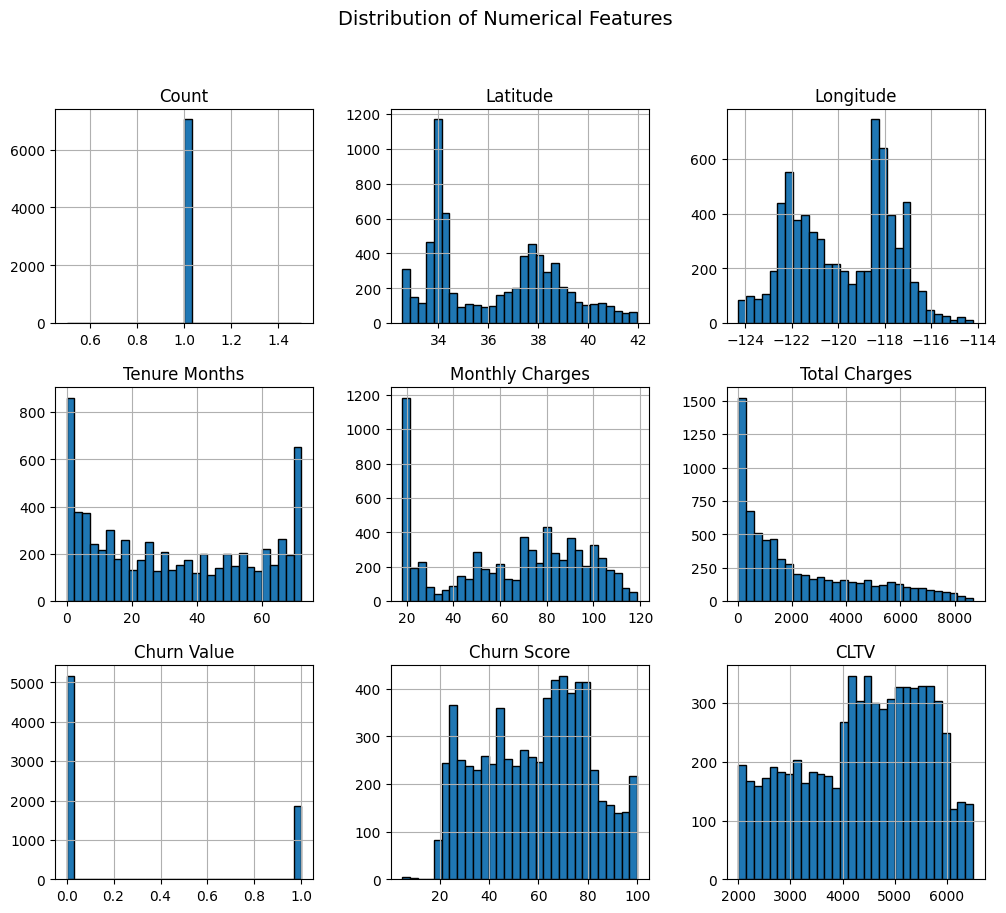

In [17]:
# Histograms for numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

# observation:
- The histogram visualization provides a comprehensive overview of the distribution of numerical features in the dataset. By plotting each numerical column separately, we can identify patterns such as skewness, outliers, and central tendencies. Using 30 bins ensures a detailed representation of data distribution, while edge coloring enhances clarity. A well-structured layout prevents overlapping plots, making interpretation easier. This analysis is crucial for understanding feature variability, detecting potential data imbalances, and informing preprocessing steps such as normalization or transformation. Overall, visualizing numerical feature distributions helps in making data-driven decisions for model development and optimization.

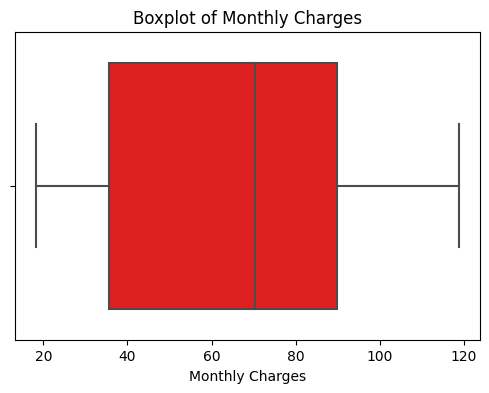

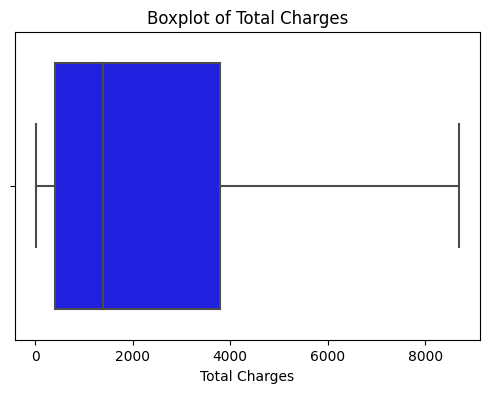

In [18]:
# Boxplot for Monthly Charges
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Monthly Charges"], color="Red")
plt.title("Boxplot of Monthly Charges")
plt.show()

# Boxplot for Total Charges
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Total Charges"], color="blue")
plt.title("Boxplot of Total Charges")
plt.show()

# observation:

- The boxplot visualization helps in identifying the distribution and presence of outliers in the Monthly Charges and Total Charges features. By using Seaborn’s boxplot(), we can observe key statistical measures such as the median, quartiles, and potential outliers. The Monthly Charges boxplot, displayed in red, provides insights into the variability of customer payments, while the Total Charges boxplot, shown in blue, highlights the overall spending patterns of customers. These visualizations are essential for detecting anomalies, understanding data dispersion, and deciding whether transformations or outlier handling techniques are necessary before building predictive models.

# Feature & Target

In [19]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Churn Value"])
y = df["Churn Value"]


# Display dataset shape
print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)

Feature Matrix Shape: (7043, 7077)
Target Vector Shape: (7043,)


# Train Test Split

In [20]:
# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the dataset

In [21]:
# Standardize the dataset for better performance of some models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification models

# 1. RandomForestClassifier

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
#rf_model.fit(X_train, y_train)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
#y_pred_rf = rf_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics in a structured format
print("\n **Random Forest Classifier Metrics:**")
print(f" Accuracy:      {rf_accuracy:.2f}")
print(f" Precision:     {rf_precision:.2f}")
print(f" Recall:        {rf_recall:.2f}")
print(f"  F1 Score:     {rf_f1:.2f}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\n **Confusion Matrix:**")
print(conf_matrix)


 **Random Forest Classifier Metrics:**
 Accuracy:      0.92
 Precision:     0.92
 Recall:        0.92
  F1 Score:     0.92

 **Confusion Matrix:**
[[1004   31]
 [  77  297]]


# 2. DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_class_model = DecisionTreeClassifier(random_state=42)

# Train the model
#dt_class_model.fit(X_train, y_train)
dt_class_model.fit(X_train_scaled, y_train)

# Predict on test set
#y_pred_dt_class = dt_class_model.predict(X_test)
y_pred_dt_class = dt_class_model.predict(X_test_scaled)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt_class)
dt_precision = precision_score(y_test, y_pred_dt_class, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt_class, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt_class, average='weighted')

# Print evaluation metrics
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")

Decision Tree Classifier Metrics:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


# 3.. GradientBoostingClassifier

In [24]:
# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
#gb_model.fit(X_train, y_train)
gb_model.fit(X_train_scaled, y_train)

# Predict on test data
#y_pred_gb = gb_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb, average='weighted')
gb_recall = recall_score(y_test, y_pred_gb, average='weighted')
gb_f1 = f1_score(y_test, y_pred_gb, average='weighted')

# Print evaluation metrics
print("\n **Gradient Boosting Classifier Metrics:**")
print(f" Accuracy:      {gb_accuracy:.2f}")
print(f" Precision:     {gb_precision:.2f}")
print(f" Recall:        {gb_recall:.2f}")
print(f"  F1 Score:     {gb_f1:.2f}")

# Confusion Matrix
print("\n **Confusion Matrix:**")
print(confusion_matrix(y_test, y_pred_gb))


 **Gradient Boosting Classifier Metrics:**
 Accuracy:      0.93
 Precision:     0.93
 Recall:        0.93
  F1 Score:     0.93

 **Confusion Matrix:**
[[988  47]
 [ 49 325]]


# 4. XGBClassifier

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

#xgb_model.fit(X_train, y_train)
xgb_model.fit(X_train_scaled, y_train)


#y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test_scaled)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print("XGBoost Classifier Metrics:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")
print(f"F1 Score: {xgb_f1:.2f}")

XGBoost Classifier Metrics:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


# compare the models performance

In [26]:
# Combine classification results into a DataFrame
class_results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Gradient Boosting','XGBoost'],
    'Accuracy': [rf_accuracy, dt_accuracy, gb_accuracy,xgb_accuracy],
    'Precision': [rf_precision, dt_precision, gb_precision,xgb_precision],
    'Recall': [rf_recall, dt_recall, gb_recall,xgb_recall],
    'F1 Score': [rf_f1, dt_f1, gb_f1,xgb_f1]
})

# Display results
print(class_results)

               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.923350   0.922590  0.923350  0.921672
1      Decision Tree  0.919801   0.919605  0.919801  0.919698
2  Gradient Boosting  0.931867   0.931754  0.931867  0.931808
3            XGBoost  0.924060   0.924408  0.924060  0.924220


# visualize the models perfomance

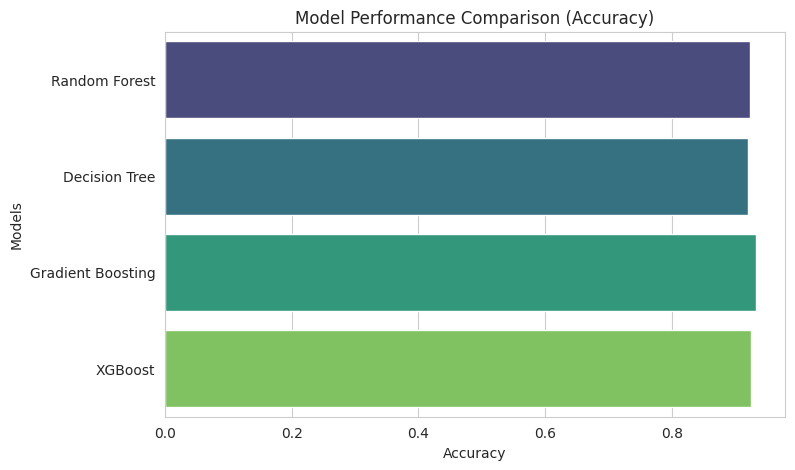

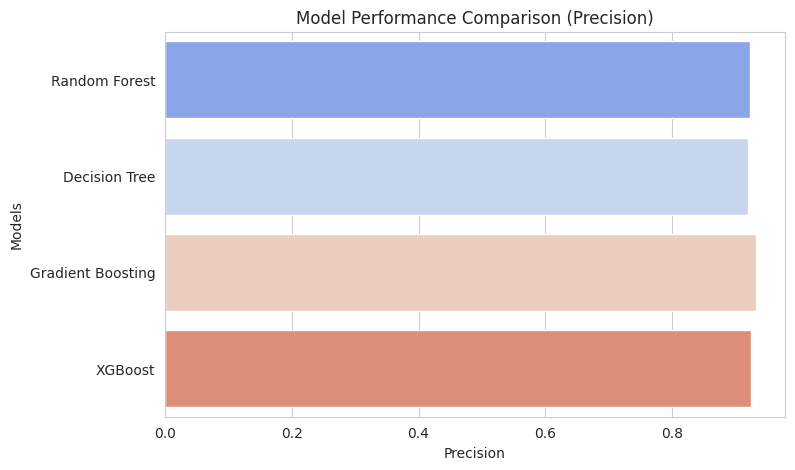

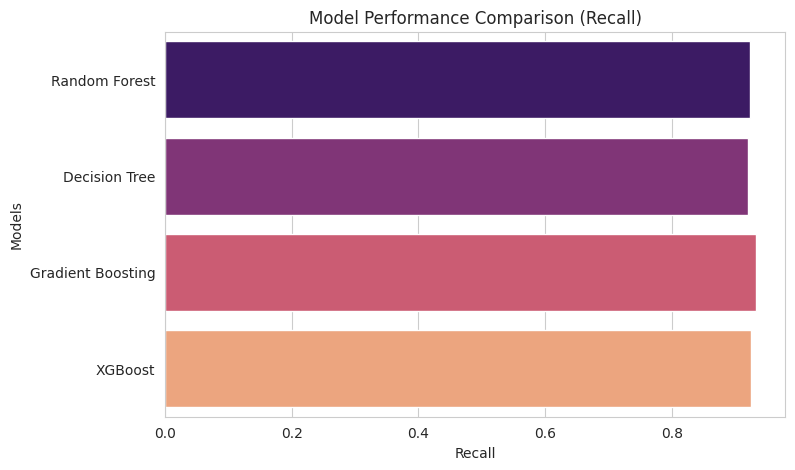

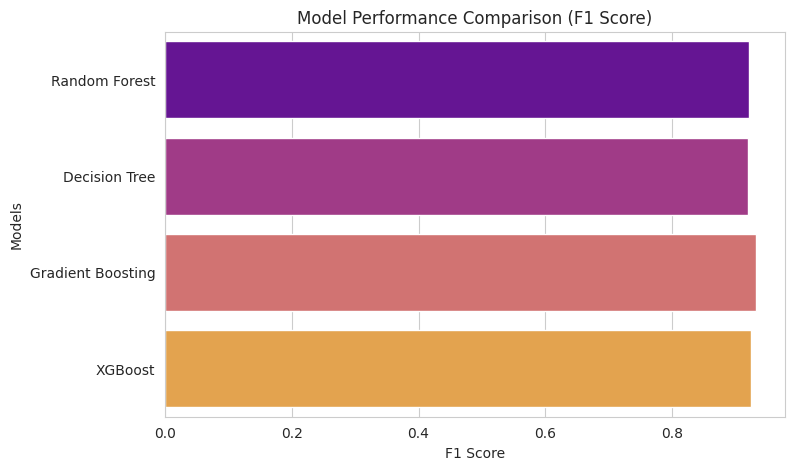

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=class_results, palette='viridis')
plt.title('Model Performance Comparison (Accuracy)')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.show()

# Plot Precision Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Precision', y='Model', data=class_results, palette='coolwarm')
plt.title('Model Performance Comparison (Precision)')
plt.xlabel('Precision')
plt.ylabel('Models')
plt.show()

# Plot Recall Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Recall', y='Model', data=class_results, palette='magma')
plt.title('Model Performance Comparison (Recall)')
plt.xlabel('Recall')
plt.ylabel('Models')
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='F1 Score', y='Model', data=class_results, palette='plasma')
plt.title('Model Performance Comparison (F1 Score)')
plt.xlabel('F1 Score')
plt.ylabel('Models')
plt.show()

In [28]:
print("\n **Model Performance Comparison:**")
print(class_results)


 **Model Performance Comparison:**
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.923350   0.922590  0.923350  0.921672
1      Decision Tree  0.919801   0.919605  0.919801  0.919698
2  Gradient Boosting  0.931867   0.931754  0.931867  0.931808
3            XGBoost  0.924060   0.924408  0.924060  0.924220


# Prediction

# - The best model based on the performance metrics is Gradient Boosting because it has the highest accuracy (0.931867), precision (0.931754), recall (0.931867), and F1-score (0.931808).

# - Since F1-score balances both precision and recall, Gradient Boosting is the optimal choice for prediction in this case.

# Conclusion

In this Telco Customer Churn Prediction case study, we aimed to build a model that could predict customer churn based on demographic, account, and service usage data. After performing data preprocessing steps, including handling missing values, encoding categorical variables, and removing outliers, we explored the dataset to understand the distribution of churn and the key factors influencing it. We trained several machine learning models, including Random Forest, Decision Tree, Gradient Boosting, and XGBoost, and evaluated their performance based on accuracy, precision, recall, and F1-score. Among these, the Gradient Boosting Classifier emerged as the best model, demonstrating the highest balance between precision and recall, making it the most reliable for predicting churn. The insights from the model highlight the importance of focusing on factors like monthly charges and service usage patterns to reduce churn. Ultimately, the findings suggest that the company can leverage the Gradient Boosting model to proactively identify customers at risk of leaving and implement targeted retention strategies, ultimately improving customer loyalty and business performance.